<a href="https://colab.research.google.com/github/davidfague/Neural-Modeling/blob/main/NMDA_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
is_colab = 'google.colab' in str(get_ipython())

In [2]:
if is_colab:
    !git clone https://github.com/davidfague/Neural-Modeling.git
    %cd /content/Neural-Modeling

import numpy as np
import matplotlib.pyplot as plt
from Modules.segment import SegmentManager
from Modules.plotting_utils import plot_sta, plot_edges

Cloning into 'Neural-Modeling'...
remote: Enumerating objects: 1522, done.
remote: Counting objects: 100% (433/433), done.
remote: Compressing objects: 100% (156/156), done.
remote: Total 1522 (delta 285), reused 406 (delta 267), pack-reused 1089
Receiving objects: 100% (1522/1522), 19.86 MiB | 22.72 MiB/s, done.
Resolving deltas: 100% (995/995), done.
/content/Neural-Modeling


In [3]:
if is_colab:
    from google.colab import drive
    drive.mount('/content/drive')
    %cd /content/drive/MyDrive/

Mounted at /content/drive
/content/drive/MyDrive


In [4]:
# %ls

In [5]:
random_state = np.random.RandomState(123)

In [6]:
output_folder = "L5PCtemplate[0]_33e-1Hz_642nseg_1500ms_108nbranch_28918NCs_28918nsyn"
dt = 0.1

sm = SegmentManager(output_folder, dt = dt, skip=300)

In [7]:
threshold = 0.003 / 1000
ms_within_somatic_spike = 2

sm.get_na_lower_bounds_for_seg(sm.segments[0], threshold, ms_within_somatic_spike)

array([[  335],
       [  342],
       [  355],
       [  383],
       [  704],
       [  927],
       [ 1342],
       [ 1473],
       [ 1693],
       [ 1873],
       [ 1953],
       [ 2183],
       [ 2364],
       [ 3847],
       [ 4016],
       [ 4465],
       [ 4559],
       [ 4597],
       [ 4646],
       [ 6594],
       [ 6917],
       [ 7223],
       [ 7332],
       [ 7469],
       [ 8152],
       [ 8735],
       [ 9539],
       [ 9944],
       [10054],
       [10754],
       [11147],
       [11168],
       [11942]])

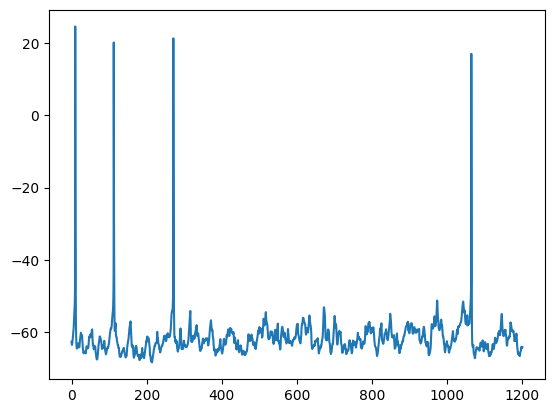

In [8]:
for i in range(1):
  plt.plot(np.arange(0,len(sm.segments[i].v)*0.1,0.1),sm.segments[i].v)

In [9]:
# skip vs na_lower_bounds
# skip = 150 : array([13085, 13122])
# skip = 100 : array([12624, 13585, 13622])
# skip = 50  : array([12239, 13124, 14085, 14122])

In [10]:
# sm.soma_spiketimes

In [11]:
# sm.soma_spiketimestamps

In [12]:
na_lower_bounds, peak_values, flattened_peak_values = sm.get_na_lower_bounds_and_peaks(threshold, ms_within_somatic_spike)

/content/Neural-Modeling/Modules/segment.py:175: UserWarning: Skipped 1 indicies, since they exceeded the data length.
  warnings.warn(warining_text)


In [13]:
# #check na_lower_bounds
# for i in range(1):
#   plt.plot(np.arange(0,len(sm.segments[i].v)*0.1,0.1),sm.segments[i].v)

In [14]:
threshold_crossings=np.diff(sm.segments[0].gNaTa > threshold)
print(threshold_crossings[0+1])

False


In [15]:
upward_crossings = np.argwhere(threshold_crossings)[::]
print(sm.segments[0].gNaTa[upward_crossings[60+1]])

[2.87149462e-06]


In [16]:
upward_crossings = np.argwhere(threshold_crossings)[::2]
print(upward_crossings)

[[  310]
 [  341]
 [  353]
 [  375]
 [  644]
 [  907]
 [ 1270]
 [ 1410]
 [ 1644]
 [ 1744]
 [ 1887]
 [ 2085]
 [ 2358]
 [ 3824]
 [ 3996]
 [ 4459]
 [ 4532]
 [ 4576]
 [ 4604]
 [ 6576]
 [ 6889]
 [ 7197]
 [ 7306]
 [ 7453]
 [ 8120]
 [ 8726]
 [ 9498]
 [ 9935]
 [10043]
 [10700]
 [11093]
 [11154]
 [11874]]


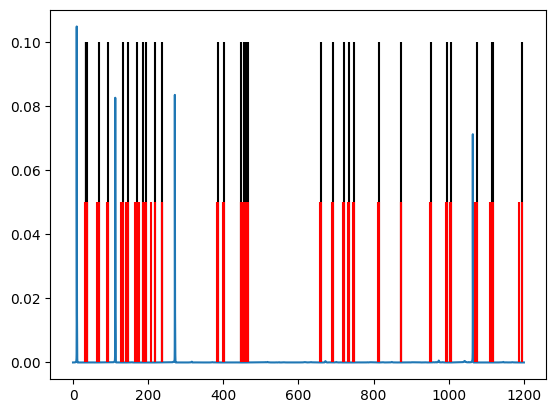

In [17]:
# #check na_lower_bounds
plt.plot(np.arange(0,len(sm.segments[0].v)*0.1,0.1),sm.segments[0].gNaTa)
for bound in na_lower_bounds[0]:
  plt.vlines(bound*0.1, ymin=0,ymax=0.1, color = 'black')
for i,val in enumerate(np.diff(sm.segments[0].gNaTa > threshold)): # threshold crossings
  if val == True:
    plt.vlines(i*0.1, ymin=0,ymax=0.05, color = 'red')
# print(na_lower_bounds[0])

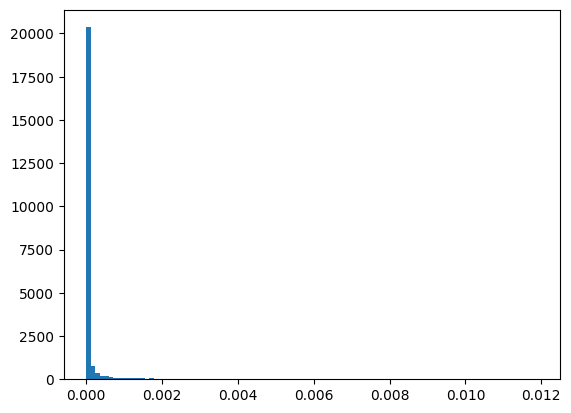

In [18]:
plt.hist(np.array(flattened_peak_values), bins = 100);

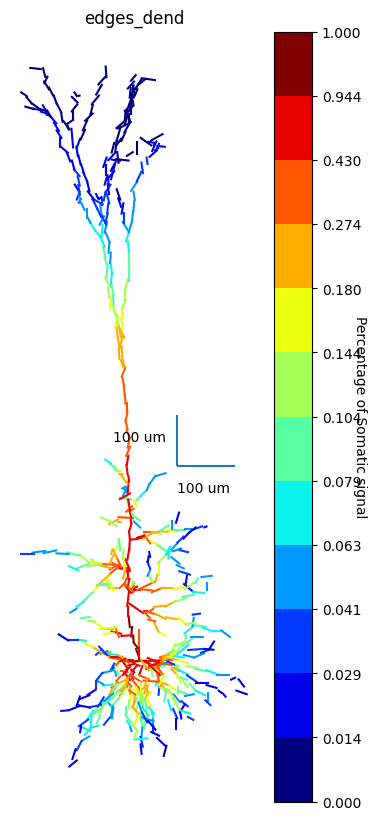

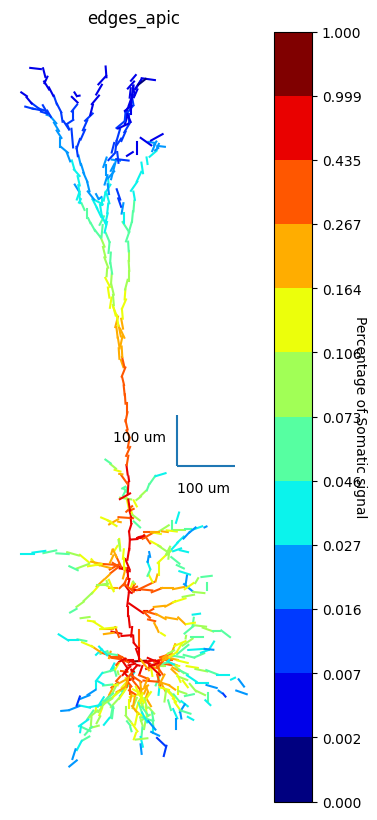

In [19]:
edges_dend = sm.get_edges(na_lower_bounds, "dend")
plot_edges(edges_dend, sm.segments, output_folder, elec_dist_var='soma_passive')

edges_apic = sm.get_edges(na_lower_bounds, "apic")
plot_edges(edges_apic, sm.segments, output_folder, elec_dist_var='soma_passive')

In [20]:
na_dend = sm.get_sta(sm.soma_spiketimes, na_lower_bounds, edges_dend, "dend", current_type='ina', elec_dist_var = 'soma_passive')
na_apic = sm.get_sta(sm.soma_spiketimes, na_lower_bounds, edges_apic, "apic", current_type='ina', elec_dist_var = 'soma_passive')

In [21]:
rand_spktimes = np.sort(np.random.choice(np.arange(0, len(sm.segments[0].v-1)), sm.soma_spiketimes.shape[0]))
na_dend_rand = sm.get_sta(rand_spktimes, na_lower_bounds, edges_dend, "dend", current_type='ina', elec_dist_var = 'soma_passive')
na_apic_rand = sm.get_sta(rand_spktimes, na_lower_bounds, edges_apic, "apic", current_type='ina', elec_dist_var = 'soma_passive')

In [22]:
len(sm.soma_spiketimes)
# np.percentile(to_plot, (1,99))

4

In [23]:
# na_lower_bounds[0]

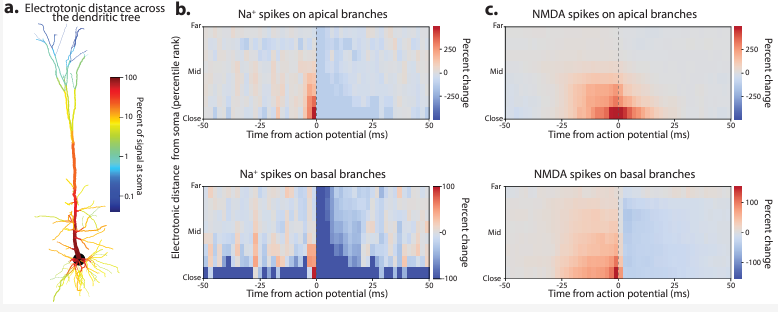

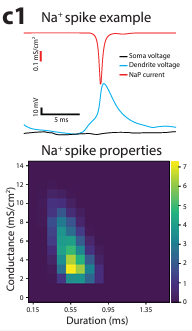

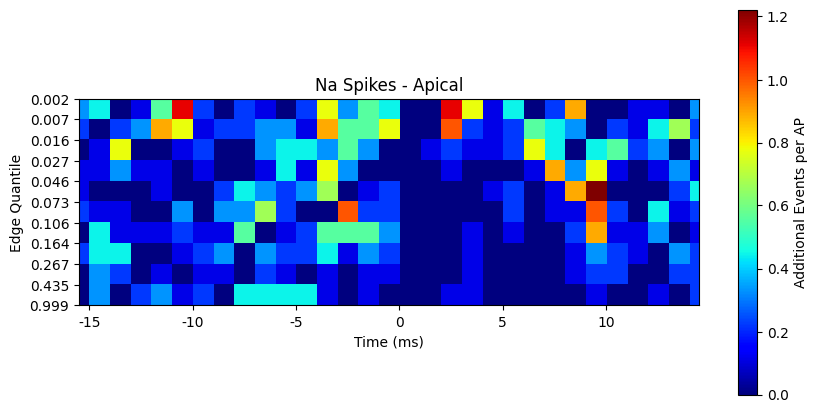

In [24]:
to_plot = (na_apic - na_apic_rand) / len(sm.soma_spiketimes)
title = 'Na Spikes - Apical'
x_ticks = np.arange(0, 40, 5)
x_tick_labels = ['{}'.format(i) for i in np.arange(-20, 20, 5)]
xlim = (5, 35)
plot_sta(to_plot, edges_apic, title, x_ticks, x_tick_labels, xlim)

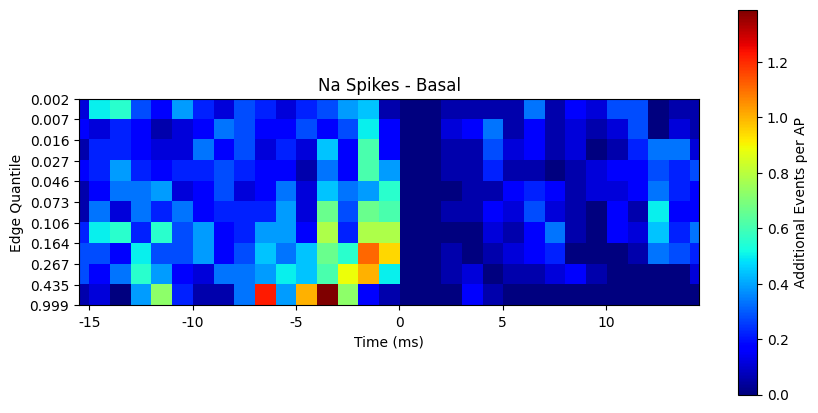

In [25]:
to_plot = (na_dend - na_dend_rand) / len(sm.soma_spiketimes)
title = 'Na Spikes - Basal'
x_ticks = np.arange(0, 40, 5)
x_tick_labels = ['{}'.format(i) for i in np.arange(-20, 20, 5)]
xlim = (5, 35)
plot_sta(to_plot, edges_apic, title, x_ticks, x_tick_labels, xlim)

In [26]:
lowery, uppery = 500, 1500

In [27]:
ca_lower_bounds, _, _, _, _, _ = sm.get_ca_nmda_lower_bounds_durations_and_peaks(lowery = lowery,
                                                                                 uppery = uppery,
                                                                                 random_state = random_state)

[]


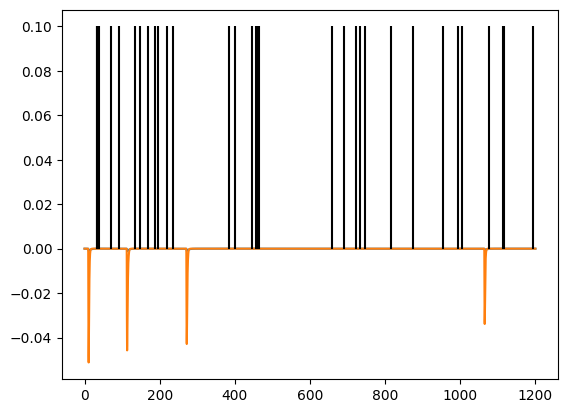

In [28]:
plt.plot(np.arange(0,len(sm.segments[0].v)*0.1,0.1),sm.segments[0].ical)
plt.plot(np.arange(0,len(sm.segments[0].v)*0.1,0.1),sm.segments[0].icah)
#trace = seg.icah + seg.ical + seg.ih
for bound in na_lower_bounds[0]:
  plt.vlines(bound*0.1, ymin=0,ymax=0.1, color = 'black')
for i,val in enumerate(np.diff(sm.segments[0].icah > threshold)): # threshold crossings
  if val == True:
    plt.vlines(i*0.1, ymin=0,ymax=0.05, color = 'red')
print(ca_lower_bounds[0])

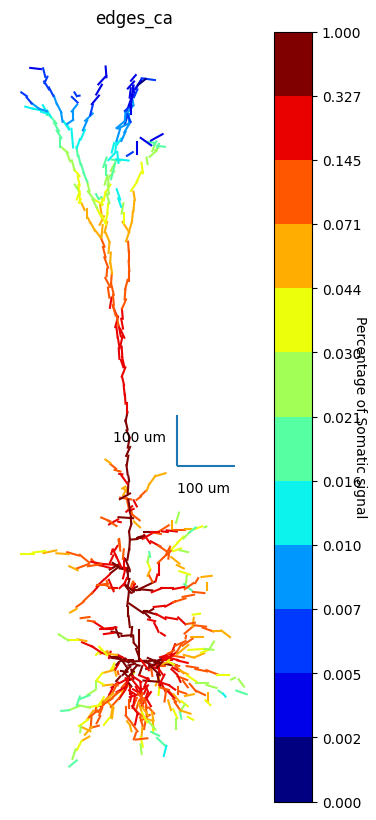

In [29]:
edges_ca = sm.get_edges(ca_lower_bounds)
plot_edges(edges_ca, sm.segments, output_folder, elec_dist_var='soma_passive')

ca_apic = sm.get_sta(sm.soma_spiketimes, ca_lower_bounds, edges_ca, "apic", current_type='ica', elec_dist_var = 'soma_passive')
rand_spktimes = np.sort(np.random.choice(np.arange(0, len(sm.segments[0].v-1)), sm.soma_spiketimes.shape[0])) # pick random times during the simulation as a control
ca_apic_rand = sm.get_sta(rand_spktimes, ca_lower_bounds, edges_ca, "apic", current_type='ica', elec_dist_var = 'soma_passive')

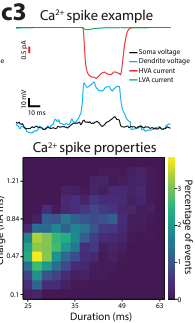

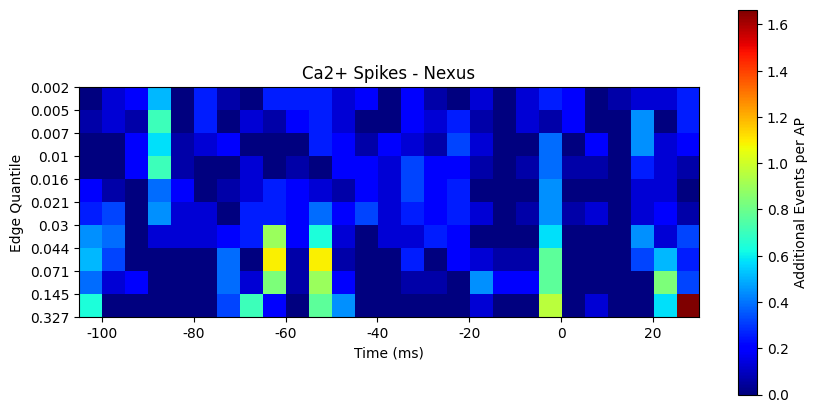

In [30]:
to_plot = (ca_apic - ca_apic_rand) / len(sm.soma_spiketimes)
title = 'Ca2+ Spikes - Nexus'
x_ticks = np.arange(0, 26, 4)
x_tick_labels = ['{}'.format(i) for i in np.arange(-100, 40, 20)]
plot_sta(to_plot, edges_ca, title, x_ticks, x_tick_labels, [])

In [31]:
nmda_lower_bounds, _, nmda_mag, _, _, _ = sm.get_ca_nmda_lower_bounds_durations_and_peaks(lowery = None,
                                                                                   uppery = None,
                                                                                   random_state = random_state)

<ipython-input-35-947b9c2bf255>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  edges_nmda_apic = sm.get_edges(nmda_lower_bounds, "apic", elec_dist_var = 'soma_passive', mag = np.array(nmda_mag), mag_th=-0.1) # note mag_th may need to change


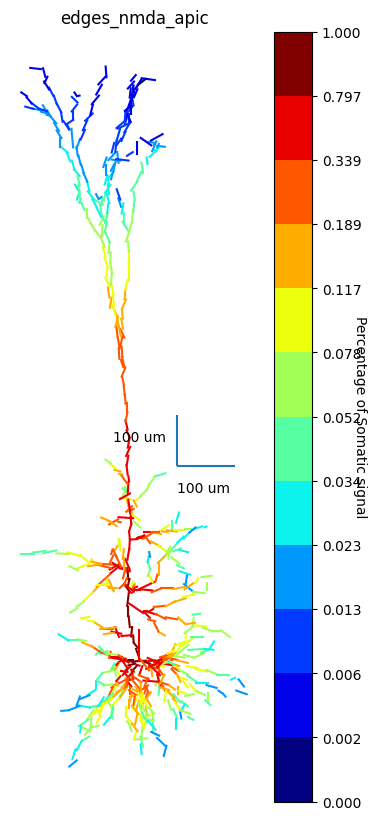

In [35]:
edges_nmda_apic = sm.get_edges(nmda_lower_bounds, "apic", elec_dist_var = 'soma_passive', mag = np.array(nmda_mag), mag_th=-0.1) # note mag_th may need to change
plot_edges(edges_nmda_apic, sm.segments, output_folder, elec_dist_var='soma_passive')

nmda_apic = sm.get_sta(sm.soma_spiketimes, nmda_lower_bounds, edges_nmda_apic, "apic", current_type='inmda', elec_dist_var = 'soma_passive', mag = nmda_mag, mag_th=-0.0001)
rand_spktimes_apic = np.sort(np.random.choice(np.arange(0, len(sm.segments[0].v-1)), sm.soma_spiketimes.shape[0]))
nmda_rand_apic = sm.get_sta(rand_spktimes_apic, nmda_lower_bounds, edges_nmda_apic, "apic", current_type='inmda', elec_dist_var = 'soma_passive', mag = nmda_mag, mag_th=-0.0001)

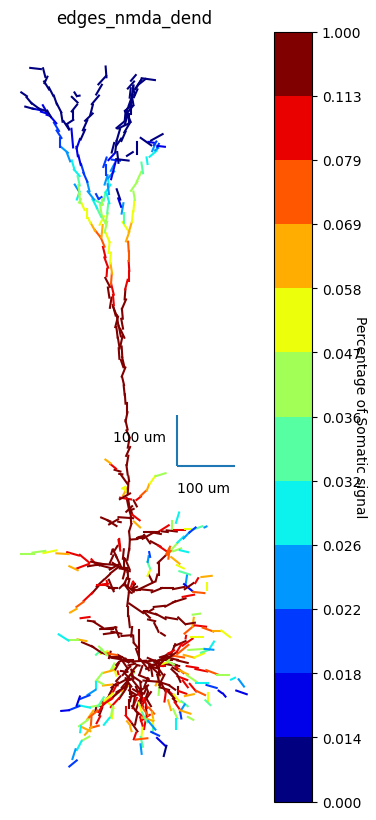

In [36]:
edges_nmda_dend = sm.get_edges(nmda_lower_bounds, "dend", elec_dist_var = 'soma_passive', mag = nmda_mag, mag_th=-0.0001)
plot_edges(edges_nmda_dend, sm.segments, output_folder, elec_dist_var='soma_passive')

nmda_dend = sm.get_sta(sm.soma_spiketimes, nmda_lower_bounds, edges_nmda_dend, "dend", current_type='inmda', elec_dist_var = 'soma_passive', mag = nmda_mag, mag_th=-0.0001)
rand_spktimes_dend = np.sort(np.random.choice(np.arange(0, len(sm.segments[0].v-1)), sm.soma_spiketimes.shape[0]))
nmda_rand_dend = sm.get_sta(rand_spktimes_dend, nmda_lower_bounds, edges_nmda_dend, "dend", current_type='inmda', elec_dist_var = 'soma_passive', mag = nmda_mag, mag_th=-0.0001)

In [38]:
# note change elec distance to nexus

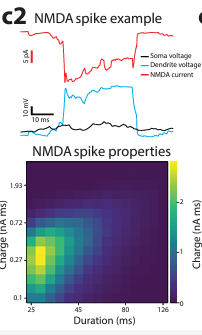

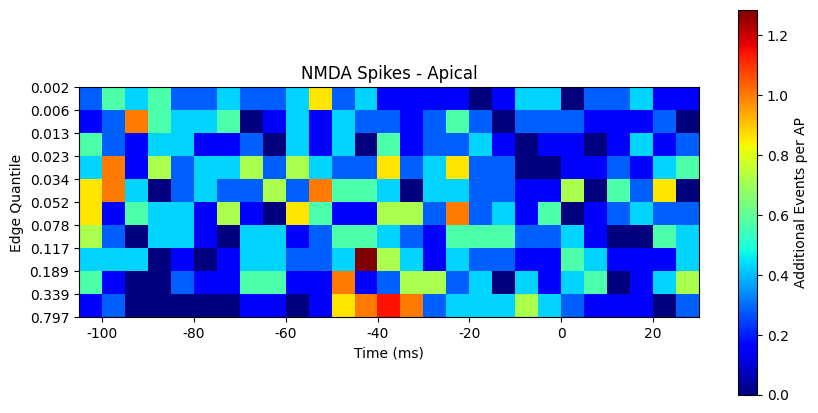

In [39]:
to_plot = (nmda_apic - nmda_rand_apic) / len(sm.soma_spiketimes)
title = 'NMDA Spikes - Apical'
x_ticks = np.arange(0, 26, 4)
x_tick_labels = ['{}'.format(i) for i in np.arange(-100, 40, 20)]
plot_sta(to_plot, edges_nmda_apic, title, x_ticks, x_tick_labels, [])

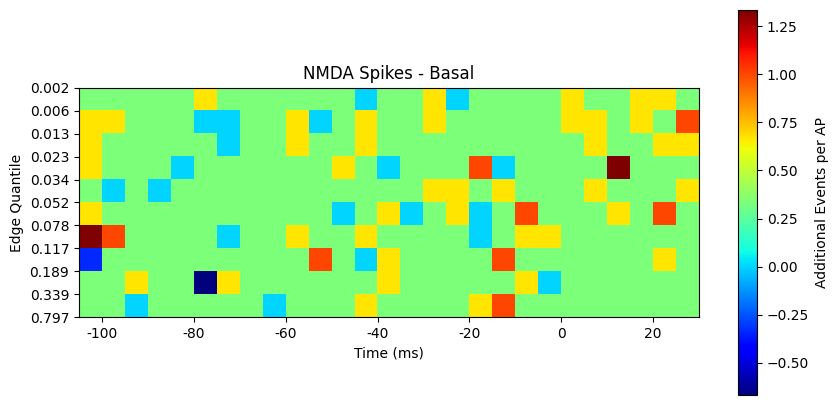

In [40]:
to_plot = (nmda_dend-nmda_rand_dend) / len(sm.soma_spiketimes)
title = 'NMDA Spikes - Basal'
x_ticks = np.arange(0, 26, 4)
x_tick_labels = ['{}'.format(i) for i in np.arange(-100, 40, 20)]
plot_sta(to_plot, edges_nmda_apic, title, x_ticks, x_tick_labels, [])

In [41]:
ca_spiketimes = []
for ind, i in enumerate(ca_lower_bounds):
    if (len(i) > 0) & ('apic[50]' in sm.segments[ind].sec):
        ca_spiketimes.extend(i.tolist())

ca_spiketimes = np.sort(ca_spiketimes) * dt
ca_spiketimes = ca_spiketimes[1:][np.diff(ca_spiketimes) > 100] # This condition is from Ben's code. It's supposed to remove duplicates.

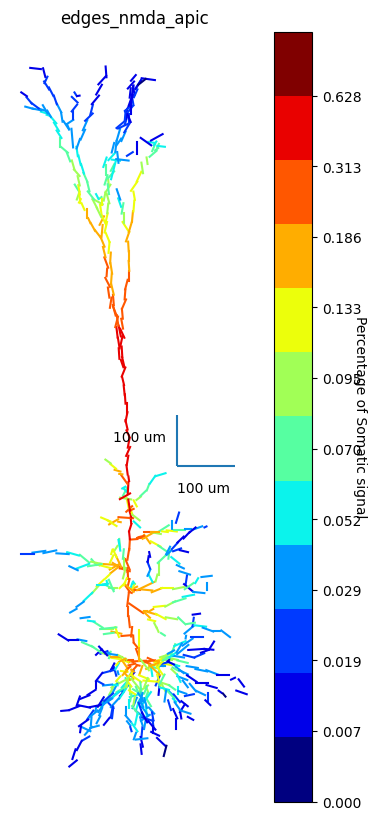

In [42]:
# new: recompute edges around nexus_passive electrotonic distance
edges_nmda_apic = sm.get_edges(nmda_lower_bounds, "apic", elec_dist_var = 'nexus_passive', mag = nmda_mag, mag_th=-0.0001)
edges_nmda_dend = sm.get_edges(nmda_lower_bounds, "dend", elec_dist_var = 'nexus_passive', mag = nmda_mag, mag_th=-0.0001)

plot_edges(edges_nmda_apic, sm.segments, output_folder, elec_dist_var='nexus_passive')

In [43]:
ca_nmda_apic = sm.get_sta(ca_spiketimes, nmda_lower_bounds, edges_nmda_apic, "apic", current_type='ica', elec_dist_var = 'nexus_passive', mag = nmda_mag, mag_th=-0.1)
ca_rand_spktimes_apic = np.sort(np.random.choice(np.arange(0, len(sm.segments[0].v-1)), ca_spiketimes.shape[0]))
ca_nmda_rand_apic = sm.get_sta(ca_rand_spktimes_apic, nmda_lower_bounds, edges_nmda_apic, "apic", current_type='ica', elec_dist_var = 'nexus_passive', mag = nmda_mag, mag_th=-0.1)

ca_nmda_dend = sm.get_sta(ca_spiketimes, nmda_lower_bounds, edges_nmda_dend, "dend", current_type='ica', elec_dist_var = 'nexus_passive', mag = nmda_mag, mag_th=-0.1)
ca_rand_spktimes_dend = np.sort(np.random.choice(np.arange(0, len(sm.segments[0].v-1)), ca_spiketimes.shape[0]))
ca_nmda_rand_dend = sm.get_sta(ca_rand_spktimes_dend, nmda_lower_bounds, edges_nmda_dend, "dend", current_type='ica', elec_dist_var = 'nexus_passive',mag = nmda_mag, mag_th=-0.1)

In [44]:
# 399, 379 are seg indices for tuft and nexus to investigate

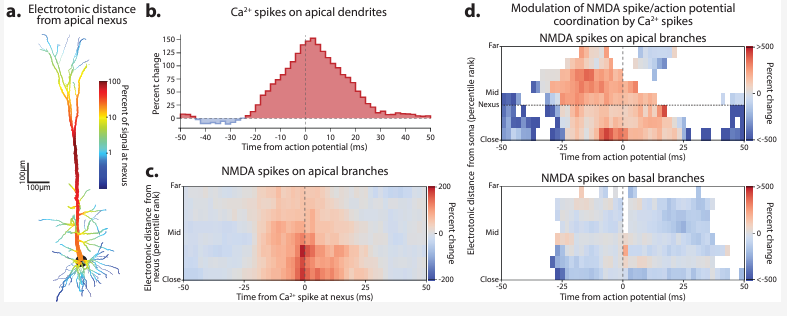

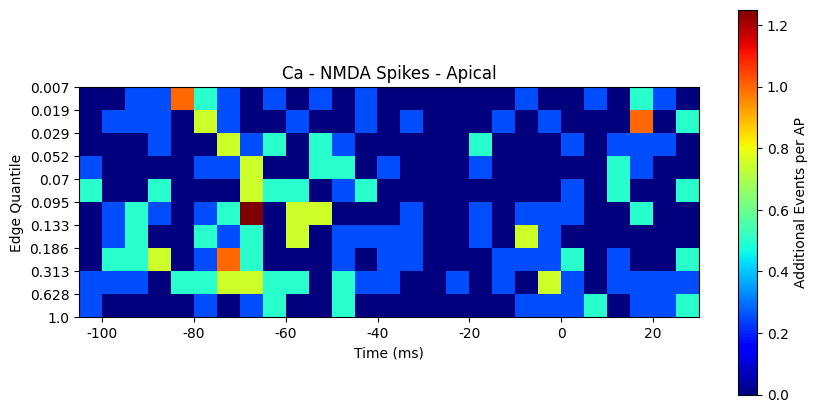

In [45]:
to_plot = (ca_nmda_apic - ca_nmda_rand_apic) / len(ca_spiketimes)
title = 'Ca - NMDA Spikes - Apical'
x_ticks = np.arange(0, 26, 4)
x_tick_labels = ['{}'.format(i) for i in np.arange(-100, 40, 20)]
plot_sta(to_plot, edges_nmda_apic, title, x_ticks, x_tick_labels, [])

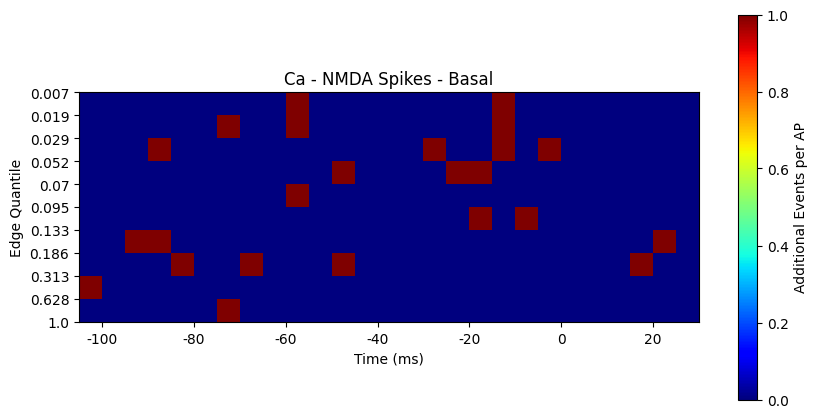

In [46]:
to_plot = (ca_nmda_dend - ca_nmda_rand_dend) / len(ca_spiketimes)
title = 'Ca - NMDA Spikes - Basal'
x_ticks = np.arange(0, 26, 4)
x_tick_labels = ['{}'.format(i) for i in np.arange(-100, 40, 20)]
plot_sta(to_plot, edges_nmda_apic, title, x_ticks, x_tick_labels, [])